# 0 Imports, data retrieval ans some basic settings
We start with some standard imports. 

In [0]:
pip install duckdb

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
## Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # plotting library
import pandas as pd

## Package for sql
import duckdb

## Distribution fitting
from scipy import stats

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-4073336992744594>, line 8
      5 import pandas as pd
      7 ## Package for sql
----> 8 import duckdb
     10 ## Distribution fitting
     11 from scipy import stats

ModuleNotFoundError: No module named 'duckdb'

In [0]:
#Common settings    
# FilePath = 'file:/dbfs/mnt/iqbsdata/HECTORdata.parquet'
FilePath = 'file:/dbfs/mnt/iqbsdata/garbage.parq'

#### Import Dataset
Importing 37 million rows

In [0]:
df = pd.read_parquet(FilePath)

In [0]:
df

,Bat_MaximumVoltage_x,Bat_MaximumVoltage_y,Bat_MinimumVoltage_y,Bat_SOC_y,Bat_TotalCurrent_y,Bat_TotalVoltage_y,Body_Active_y,Body_EmergencyStopActivated_y,Chas_AccPedalPos1000_y,Chas_BrakePedalPos1000_y,Chas_Signal_AirCon_SW_y,Chas_TotalVehicleDistance_m_y,Chas_Weight_Axle_1_y,Chas_Weight_Axle_2_y,Chas_Weight_Axle_3_y,Chas_Weight_Total_y,Data_Energy_CurrentEnergyBody_y,FCell_2_RX_air_flow_y,FCell_2_RX_cool_Temp_y,FCell_2_RX_Stack_Current_y,FCell_2_RX_Stack_Voltage_y,FCell_3_RX_air_flow_y,FCell_3_RX_cool_Temp_y,FCell_3_RX_Stack_Current_y,FCell_3_RX_Stack_Voltage_y,FCell_RX_air_flow_y,FCell_RX_cool_Temp_y,FCell_RX_Stack_Current_y,FCell_RX_Stack_Voltage_y,gps_altitude_y,gps_latitude_y,gps_longitude_y,H2_Fill_ALL_y,H2_Press_ALL_y,H2_Temp_ALL_y,H2_Weight_ALL_y,HVS3_RX_Result_I_Value_y,MINVa_RX_VP_Status1_1_ActualSpeed_y,MINVa_RX_VP_Status1_1_ActualTorque_y,MINVa_RX_VP_Status2_1_ActualcalcDC_INCurrent_y,ToDisp_Drive_Temp_Motor_y,VBB_30_y
0,2022-08-01 04:04:12+00:00,0.0,NaN,NaN,-3200.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,5800.0,NaN,4900.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.1,0.0,24.9,NaN,0.1,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,25771.0
1,2022-08-01 04:04:12.010000+00:00,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-5.0,NaN,6600.0,NaN,17300.0,NaN,0.0,25.300001,0.1,0.1,0.0,25.400000,NaN,NaN,NaN,NaN,-0.3,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-40.0,NaN
2,2022-08-01 04:04:12.240000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,5800.0,6600.0,4900.0,17300.0,0.0,0.0,25.300001,0.2,0.1,0.0,25.400000,-0.5,0.1,0.0,24.9,-0.3,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25762.0
3,2022-08-01 04:04:12.480000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,5800.0,6600.0,4900.0,17300.0,0.0,0.0,25.300001,0.3,0.1,0.0,25.400000,-0.5,0.1,0.0,24.9,-0.2,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25780.0
4,2022-08-01 04:04:12.780000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,5800.0,6600.0,4900.0,17300.0,0.0,0.0,25.300001,0.2,0.1,0.0,25.400000,-0.3,0.1,0.0,24.9,-0.2,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37404965,2023-04-29 16:04:34.220000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,0.0,0.0,41.600002,0.5,0.1,0.0,42.700001,0.1,0.1,0.0,41.5,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24318.0
37404966,2023-04-29 16:04:34.460000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,0.0,0.0,41.600002,0.5,0.1,0.0,42.700001,0.1,0.1,0.0,41.5,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24318.0
37404967,2023-04-29 16:04:34.700000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,0.0,0.0,41.600002,0.5,0.1,0.0,42.700001,0.1,0.1,0.0,41.5,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24318.0
37404968,2023-04-29 16:04:34.940000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,0.0,0.0,41.600002,0.5,0.1,0.0,42.700001,0.1,0.1,0.0,41.5,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24318.0


# 1 Data Exploration
Select columns for subset

In [0]:
select = [
    "Bat_MaximumVoltage_x",
    "Bat_TotalCurrent_y",
    "Body_Active_y",
    "MINVa_RX_VP_Status1_1_ActualSpeed_y",
    "Bat_TotalVoltage_y",
    "Chas_Weight_Axle_1_y",
    "Chas_Weight_Axle_2_y",
    "Chas_Weight_Axle_3_y",
    "Chas_Weight_Total_y"
]


Create a subset with no NaN Values. For exploration purpose get the first 200k records

In [0]:
subset = df[select].dropna().iloc[:200000]

Let's check what's in the data.

In [0]:
subset.describe()

,Bat_TotalCurrent_y,Body_Active_y,MINVa_RX_VP_Status1_1_ActualSpeed_y,Bat_TotalVoltage_y,Chas_Weight_Axle_1_y,Chas_Weight_Axle_2_y,Chas_Weight_Axle_3_y,Chas_Weight_Total_y
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-383.375700,0.381670,43.343075,524.160120,15869.052435,16585.966930,15150.150765,24744.638610
std,1051.339487,0.485797,101.402894,196.482626,12390.702980,11888.958885,12910.726023,6362.234216
min,-3200.000000,0.000000,-49.000000,0.000000,0.000000,0.000000,0.000000,-30269.000000
25%,-31.000000,0.000000,0.000000,569.000000,6200.000000,7100.000000,5200.000000,18500.000000
50%,-31.000000,0.000000,0.000000,590.000000,7600.000000,9100.000000,6500.000000,23300.000000
75%,23.000000,1.000000,5.000000,615.000000,32767.000000,32767.000000,32767.000000,32765.000000
max,658.000000,1.000000,487.000000,656.000000,32767.000000,32767.000000,32767.000000,32765.000000


In [0]:
def plot_corr(df, cols=None, vm=1.0):
    fig, ax = plt.subplots()
    if cols is None:
        cols = df.columns
    corr = df[cols].corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, 
                #mask=mask, 
                cmap=cmap,
                fmt=".2f",
                vmax=vm,       # The maximum value of the legend. All higher vals will be same color
                vmin=-vm,      # The minimum value of the legend. All lower vals will be same color
                center=0,      # The center value of the legend. With divergent cmap, where white is
                square=True,   # Force cells to be square
                linewidths=.5, # Width of lines that divide cells
                cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
                ax=ax
               )
    return corr, ax

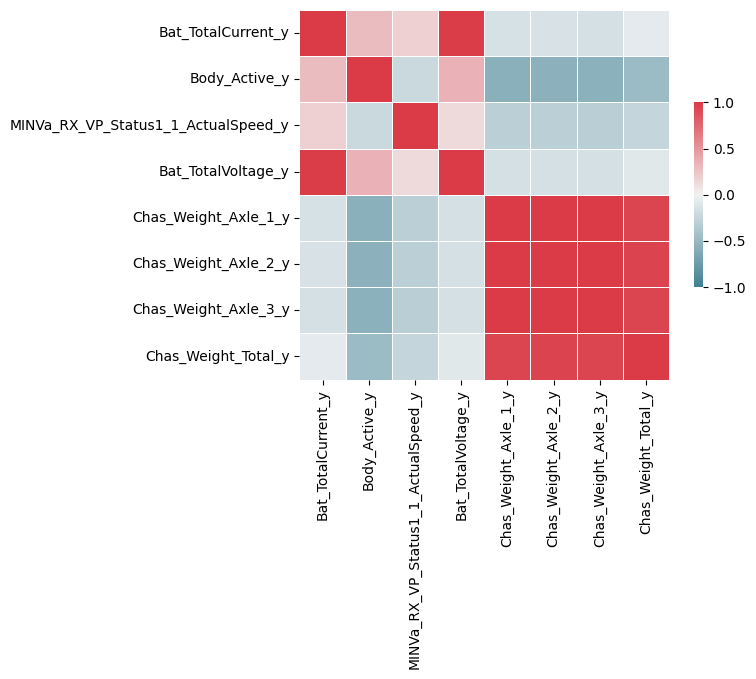

In [0]:
plot_corr(subset)
plt.show()

In [0]:
#yyyy-mm-dd
def get_day(date):
    return duckdb.query("SELECT  * FROM df WHERE CAST(Bat_MaximumVoltage_x as DATE) = '" + date + "'").df()

#year , week
def get_week(year,week):
    return duckdb.query("SELECT  * FROM df WHERE YEAR(Bat_MaximumVoltage_x) = '" + year + "' AND Week(Bat_MaximumVoltage_x) = '" + week + "'").df()

#year , month
def get_month(year,month):
    return duckdb.query("SELECT  * FROM df WHERE YEAR(Bat_MaximumVoltage_x) = '" + year + "' AND MONTH(Bat_MaximumVoltage_x) = '" + month  +"'").df()

# Examples
# get_day("2023-04-25") retuns 1 day
# get_week("2023","10") returns 1 week
# get_month("2023","1") returns 1 month

In [0]:
get_day("2023-04-25")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,Bat_MaximumVoltage_x,Bat_MaximumVoltage_y,Bat_MinimumVoltage_y,Bat_SOC_y,Bat_TotalCurrent_y,Bat_TotalVoltage_y,Body_Active_y,Body_EmergencyStopActivated_y,Chas_AccPedalPos1000_y,Chas_BrakePedalPos1000_y,Chas_Signal_AirCon_SW_y,Chas_TotalVehicleDistance_m_y,Chas_Weight_Axle_1_y,Chas_Weight_Axle_2_y,Chas_Weight_Axle_3_y,Chas_Weight_Total_y,Data_Energy_CurrentEnergyBody_y,FCell_2_RX_air_flow_y,FCell_2_RX_cool_Temp_y,FCell_2_RX_Stack_Current_y,FCell_2_RX_Stack_Voltage_y,FCell_3_RX_air_flow_y,FCell_3_RX_cool_Temp_y,FCell_3_RX_Stack_Current_y,FCell_3_RX_Stack_Voltage_y,FCell_RX_air_flow_y,FCell_RX_cool_Temp_y,FCell_RX_Stack_Current_y,FCell_RX_Stack_Voltage_y,gps_altitude_y,gps_latitude_y,gps_longitude_y,H2_Fill_ALL_y,H2_Press_ALL_y,H2_Temp_ALL_y,H2_Weight_ALL_y,HVS3_RX_Result_I_Value_y,MINVa_RX_VP_Status1_1_ActualSpeed_y,MINVa_RX_VP_Status1_1_ActualTorque_y,MINVa_RX_VP_Status2_1_ActualcalcDC_INCurrent_y,ToDisp_Drive_Temp_Motor_y,VBB_30_y
0,2023-04-25 04:04:35+00:00,0.0,0.0,0.0,-3200.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,32767.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,12.900001,NaN,0.1,86.0,51.550428,7.250227,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,-40.0,NaN
1,2023-04-25 04:04:35.010000+00:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,-5.0,32767.0,NaN,32767.0,32765.0,4.0,NaN,12.6,-0.6,0.1,NaN,12.7,-0.5,0.1,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,24672.0
2,2023-04-25 04:04:35.240000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,4.0,0.0,12.6,-0.6,0.1,0.0,12.7,-0.5,0.1,0.0,12.900001,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24681.0
3,2023-04-25 04:04:35.520000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,51.550433,7.250227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-25 04:04:35.540000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,4.0,0.0,12.6,-0.6,0.1,0.0,12.7,-0.5,0.1,0.0,12.900001,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24681.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109916,2023-04-25 16:03:40.580000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,11.0,0.0,13.7,-0.6,0.1,0.0,13.7,-1.0,0.1,0.0,13.800000,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24979.0
109917,2023-04-25 16:03:40.820000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,11.0,0.0,13.7,-0.6,0.1,0.0,13.7,-1.0,0.1,0.0,13.800000,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24979.0
109918,2023-04-25 16:03:41.060000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,11.0,0.0,13.7,-0.6,0.1,0.0,13.7,-1.0,0.1,0.0,13.800000,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24979.0
109919,2023-04-25 16:03:41.300000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,32767.0,32767.0,32767.0,32765.0,11.0,0.0,13.7,-0.6,0.1,0.0,13.7,-1.0,0.1,0.0,13.800000,0.0,0.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24970.0


Plot correlation matrix for 1 month

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

(                                                Bat_MaximumVoltage_y  ...  VBB_30_y
 Bat_MaximumVoltage_y                                        1.000000  ...  0.913763
 Bat_MinimumVoltage_y                                        0.999953  ...  0.913547
 Bat_SOC_y                                                   0.899469  ...  0.812194
 Bat_TotalCurrent_y                                          0.987786  ...  0.908524
 Bat_TotalVoltage_y                                          0.999867  ...  0.913548
 Body_Active_y                                               0.060673  ...  0.000852
 Body_EmergencyStopActivated_y                               0.066964  ... -0.026253
 Chas_AccPedalPos1000_y                                      0.022185  ...  0.023580
 Chas_BrakePedalPos1000_y                                    0.021642  ...  0.006215
 Chas_Signal_AirCon_SW_y                                     0.016420  ...  0.008119
 Chas_TotalVehicleDistance_m_y                               0.00

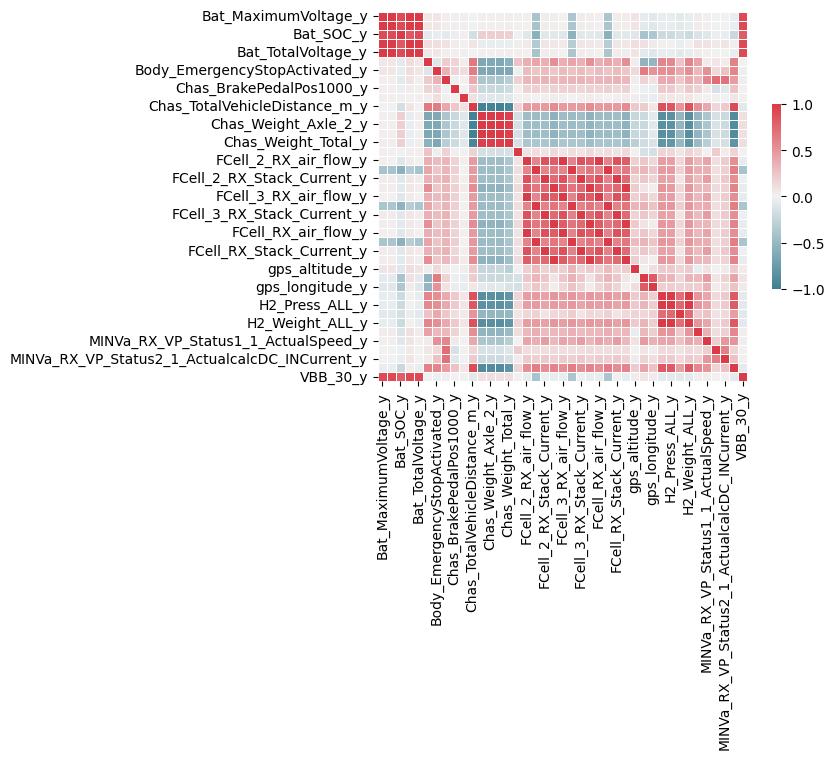

In [0]:
plot_corr(get_month("2023","1"))

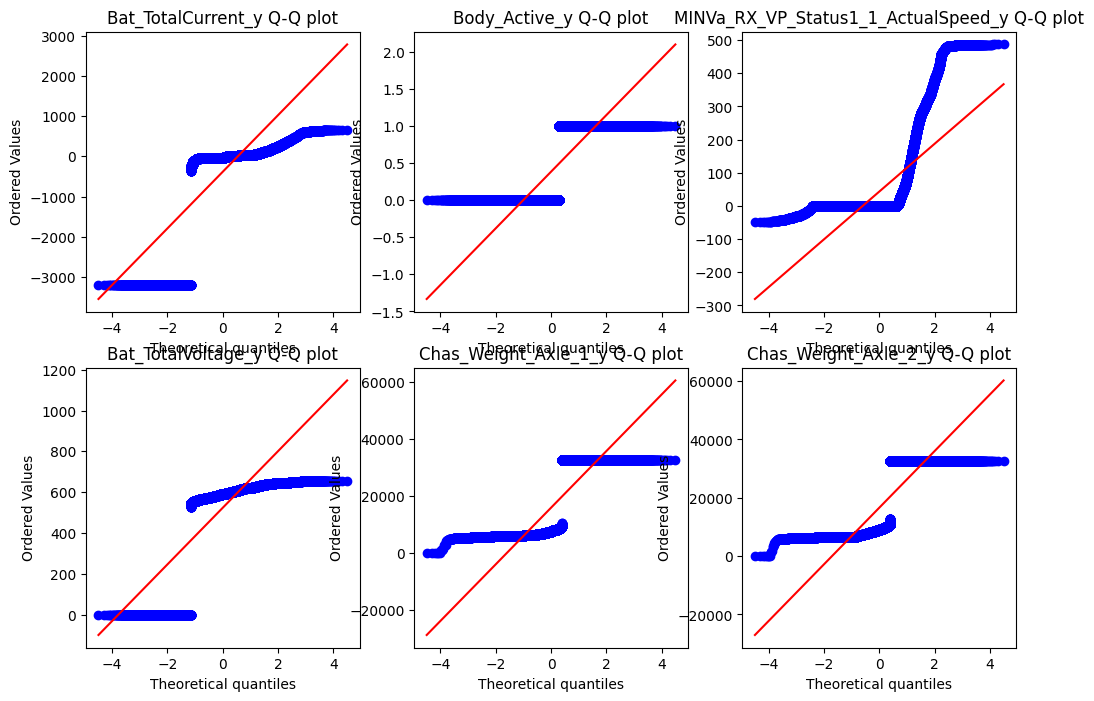

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
File <command-4073336992744609>, line 11
      9 for i, col in enumerate(features):
     10     feats = floats[col]
---> 11     stats.probplot(feats, plot=axs[i], dist=stats.norm)
     12     axs[i].set_title(f"{col} Q-Q plot")
     14 plt.tight_layout()

IndexError: index 6 is out of bounds for axis 0 with size 6

In [0]:
# subset2 = get_day("2023-04-25")
floats = subset.select_dtypes(include="float64")
features = floats.columns

# prepare axes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()

for i, col in enumerate(features):
    feats = floats[col]
    stats.probplot(feats, plot=axs[i], dist=stats.norm)
    axs[i].set_title(f"{col} Q-Q plot")

plt.tight_layout()

In [0]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
dist = stats.norm

for i, col in enumerate(features):
    data = floats[col]

    # lets get a good starting point for the parameters
    mu = data.mean()
    sigma = data.std()
    bounds = ((mu - 3 * sigma, mu + 3 * sigma), (0, sigma * 2))
    result = stats.fit(dist, data, bounds=bounds)

    # and plot the fitted result, including the p-values
    result.plot(ax=axs[i])
    kstest = stats.kstest(data, stats.norm(*result.params).cdf)
    axs[i].set_title(f"{col} fit (p={kstest.pvalue:.2f})")

plt.tight_layout()


In [0]:
# Box Plot
# import seaborn as sns
sns.boxplot(floats['Bat_TotalCurrent_y'])
floats['Bat_TotalCurrent_y'].describe()

In [0]:


# Calculate the z-score for each student's height
z = np.abs(stats.zscore(floats['Bat_TotalCurrent_y']))

# Identify outliers as students with a z-score greater than 3
threshold = 2.6
outliers = floats[z > threshold]

# Print the outliers
print(outliers)

In [0]:

# # calculate IQR for column Height
# Q1 = floats['Bat_TotalCurrent_y'].quantile(0.25)
# Q3 = floats['Bat_TotalCurrent_y'].quantile(0.75)
# IQR = Q3 - Q1

# # identify outliers
# threshold = 1.5
# outliers = floats[(floats['Bat_TotalCurrent_y'] < Q1 - threshold * IQR) | (floats['Bat_TotalCurrent_y'] > Q3 + threshold * IQR)]
# print(outliers)

In [0]:
# drop rows containing outliers
floats_no_outliers =  floats.drop(outliers.index)

In [0]:
# Box Plot
# import seaborn as sns
sns.boxplot(floats_no_outliers['Bat_TotalCurrent_y'])
floats_no_outliers['Bat_TotalCurrent_y'].describe()

In [0]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.ravel()
dist = stats.norm

features = floats_no_outliers['Bat_TotalCurrent_y']
for i, col in enumerate('Bat_TotalCurrent_y'):
    data = floats_no_outliers['Bat_TotalCurrent_y']

    # lets get a good starting point for the parameters
    mu = data.mean()
    sigma = data.std()
    bounds = ((mu - 3 * sigma, mu + 3 * sigma), (0, sigma * 2))
    result = stats.fit(dist, data, bounds=bounds)

    # and plot the fitted result, including the p-values
    result.plot(ax=axs[i])
    kstest = stats.kstest(data, stats.norm(*result.params).cdf)
    axs[i].set_title(f"{col} fit (p={kstest.pvalue:.2f})")

plt.tight_layout()

In [0]:
df.columns